# Programming task 10: Dimensionality Reduction

In [31]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Exporting the results to PDF
Once you complete the assignments, export the entire notebook as PDF and attach it to your homework solutions. 
The best way of doing that is
1. Run all the cells of the notebook.
2. Export/download the notebook as PDF (File -> Download as -> PDF via LaTeX (.pdf)).
3. Concatenate your solutions for other tasks with the output of Step 2. On a Linux machine you can simply use `pdfunite`, there are similar tools for other platforms too. You can only upload a single PDF file to Moodle.

Make sure you are using `nbconvert` Version 5.5 or later by running `jupyter nbconvert --version`. Older versions clip lines that exceed page width, which makes your code harder to grade.

##  PCA

Given the data in the matrix X your tasks is to:
* Calculate the covariance matrix $\Sigma$.
* Calculate eigenvalues and eigenvectors of $\Sigma$.
* Plot the original data $X$ and the eigenvectors to a single diagram. What do you observe? Which eigenvector corresponds to the smallest eigenvalue?
* Determine the smallest eigenvalue and remove its corresponding eigenvector. The remaining eigenvector is the basis of a new subspace.
* Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis.	

### The given data X

In [32]:
X = np.array([(-3,-2),(-2,-1),(-1,0),(0,1),
              (1,2),(2,3),(-2,-2),(-1,-1),
              (0,0),(1,1),(2,2), (-2,-3),
              (-1,-2),(0,-1),(1,0), (2,1),(3,2)])

### Task 1: Calculate the covariance matrix $\Sigma$

In [33]:
def get_covariance(X):
    """Calculates the covariance matrix of the input data.
    
    Parameters
    ----------
    X : array, shape [N, D]
        Data matrix.
        
    Returns
    -------
    Sigma : array, shape [D, D]
        Covariance matrix
        
    """
    X_norm = X - X.mean(axis=0, keepdims=True)
    Sigma = X_norm.T @ X_norm / X.shape[0]
    return Sigma

### Task 2: Calculate eigenvalues and eigenvectors of  $\Sigma$.

In [34]:
def get_eigen(S):
    """Calculates the eigenvalues and eigenvectors of the input matrix.
    
    Parameters
    ----------
    S : array, shape [D, D]
        Square symmetric positive definite matrix.
        
    Returns
    -------
    L : array, shape [D]
        Eigenvalues of S
    U : array, shape [D, D]
        Eigenvectors of S
    
    """
    L, U = np.linalg.eigh(S)
    return L, U

### Task 3: Plot the original data X and the eigenvectors to a single diagram.

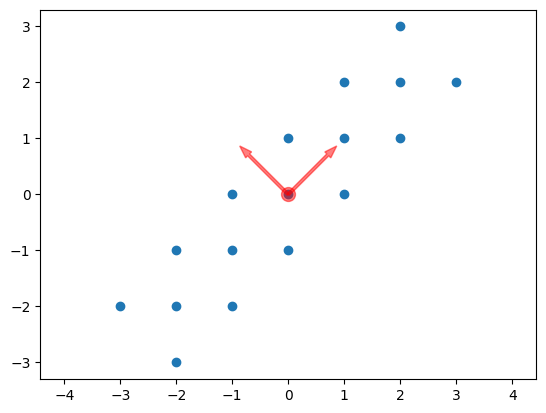

In [35]:
# plot the original data
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

# plot the mean of the data
mean_d1, mean_d2 = X.mean(0)
plt.plot(mean_d1, mean_d2, 'o', markersize=10, color='red', alpha=0.5)

# calculate the covariance matrix
Sigma = get_covariance(X)
# calculate the eigenvector and eigenvalues of Sigma
L, U = get_eigen(Sigma)

plt.arrow(mean_d1, mean_d2, U[0, 0], U[1, 0], width=0.05, color='red', alpha=0.5)
plt.arrow(mean_d1, mean_d2, U[0, 1], U[1, 1], width=0.05, color='red', alpha=0.5);

What do you observe in the above plot? Which eigenvector corresponds to the smallest eigenvalue?


The eigenvector corresponding to the smallest eigenvalue is aligned with the data in the direction where we have less variance. 

In contrast, the eigenvector corresponding to the largest eigenvalue captures a direction in the data that contains most of the variance. Thus, we can project our data onto this eigenvector without loosing too much information.

### Task 4: Transform the data

Determine the smallest eigenvalue and remove its corresponding eigenvector. The remaining eigenvector is the basis of a new subspace. Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis.

In [36]:
def transform(X, U, L):
    """Transforms the data in the new subspace spanned by the eigenvector corresponding to the largest eigenvalue.
    
    Parameters
    ----------
    X : array, shape [N, D]
        Data matrix.
    L : array, shape [D]
        Eigenvalues of Sigma_X
    U : array, shape [D, D]
        Eigenvectors of Sigma_X
        
    Returns
    -------
    X_t : array, shape [N, 1]
        Transformed data
        
    """
    X_t = X.dot(U[:, np.argmax(L)])
    return X_t

In [45]:
X_t = transform(X, U, L)
print(X_t)

[-3.53553391 -2.12132034 -0.70710678  0.70710678  2.12132034  3.53553391
 -2.82842712 -1.41421356  0.          1.41421356  2.82842712 -3.53553391
 -2.12132034 -0.70710678  0.70710678  2.12132034  3.53553391]


##  SVD

### Task 5: Given the matrix $M$ find its SVD decomposition $M= U \cdot \Sigma \cdot V$ and reduce it to one dimension using the approach described in the lecture.

In [38]:
M = np.array([[1, 2], [6, 3],[0, 2]])
print(M)

[[1 2]
 [6 3]
 [0 2]]


In [39]:
def reduce_to_one_dimension(M):
    """Reduces the input matrix to one dimension using its SVD decomposition.
    
    Parameters
    ----------
    M : array, shape [N, D]
        Input matrix.
        
    Returns
    -------
    M_t: array, shape [N, 1]
        Reduce matrix.
    
    """
    U, sigma, V_t = np.linalg.svd(M, 0)
    print(sigma)
    # np.linalg.svd return U, S, V^T -> transpose last matrix to obtain V
    V = V_t.T
    Sigma = np.diag(sigma)
    print(Sigma)
    
    # construct the truncated Sigma, here called Sigma_c
    Sigma_c = Sigma.copy()
    Sigma_c[1, 1] = 0
    print(Sigma_c)
    
    M_t = U.dot(Sigma_c)

    # or alternatively and usually prefered
    M_t = M.dot(V[:, 0])
    return M_t

In [40]:
print(reduce_to_one_dimension(M))

[7.02571561 2.15390813]
[[7.02571561 0.        ]
 [0.         2.15390813]]
[[7.02571561 0.        ]
 [0.         0.        ]]
[-1.90211303 -6.68109819 -1.05146222]
